In [1]:
# --- Libraries with a short description ---
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for plotting
import numpy as np #for numeric calculations and making simulated data.
import seaborn as sns # for plotting, an extension on matplotlib
import scipy.stats as stats # for zscore  

# - sklearn has many data analysis utility functions like scaling as well as a large variety of modeling tools.
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE


columns = ['T_e','T_bb','tau_T','E','Mu','I','U']

# Data Analysis 

In [2]:
import pandas as pd
data_path="D:\Downloads\data_AMP_PCS_reduced.csv"
df= pd.read_csv(data_path,names=columns)
print (df)



           T_e   T_bb  tau_T         E        Mu             I           U
0          0.0  1.000    2.0  3.000000  4.000000      5.000000    6.000000
1         40.0  0.001    0.5  0.000200  0.015920    167.714879  -14.460404
2         40.0  0.001    0.5  0.000212  0.806686    763.139341   -0.846367
3         40.0  0.001    0.5  0.000240  0.337873    678.207806   -8.096192
4         40.0  0.001    0.5  0.000272  0.015920    488.677115  -38.014348
...        ...    ...    ...       ...       ...           ...         ...
1258286  200.0  0.003    3.5  1.216844  0.806686  27355.236574  420.487611
1258287  200.0  0.003    3.5  1.376975  0.337873  20414.520050  806.619797
1258288  200.0  0.003    3.5  1.558179  0.015920   7554.380847  139.930834
1258289  200.0  0.003    3.5  1.657536  0.806686   6008.720326   81.745023
1258290  200.0  0.003    3.5  1.875661  0.337873   3565.451966  129.979284

[1258291 rows x 7 columns]


In [3]:

print (df.dtypes)
print (df.shape)

T_e      float64
T_bb     float64
tau_T    float64
E        float64
Mu       float64
I        float64
U        float64
dtype: object
(1258291, 7)


In [55]:
df_small = df.sample(100000)
df_small_5K= df.sample(5000)


In [58]:
size_df = len(df)
size_df_1 =len(df_small)
size_df_2=len(df_small_5K)


df.dropna(axis=0,how='any',inplace=True)
df_small.dropna(axis=0,how='any',inplace=True)
df_small_5K.dropna(axis=0,how='any',inplace=True)

print(size_df-len(df),"empty rows removed in full dataset")
print(size_df_1-len(df_small),"empty rows removed in 10K dataset")
print(size_df_2-len(df_small_5K),"empty rows removed in 5K dataset")

0 empty rows removed in full dataset
0 empty rows removed in 10K dataset
0 empty rows removed in 5K dataset


In [4]:
df_min_maxed= pd.DataFrame()
for a, b in enumerate(df):
    df_min_maxed[b]= minmax_scale(df[b])
print(df_min_maxed)

         T_e      T_bb  tau_T         E        Mu         I         U
0        0.0  1.000000    0.5  1.000000  1.000000  0.000006  0.757891
1        0.2  0.000000    0.0  0.000000  0.000000  0.000209  0.757203
2        0.2  0.000000    0.0  0.000004  0.198481  0.000953  0.757661
3        0.2  0.000000    0.0  0.000014  0.080810  0.000847  0.757417
4        0.2  0.000000    0.0  0.000024  0.000000  0.000610  0.756411
...      ...       ...    ...       ...       ...       ...       ...
1258286  1.0  0.002002    1.0  0.405575  0.198481  0.034155  0.771832
1258287  1.0  0.002002    1.0  0.458956  0.080810  0.025489  0.784820
1258288  1.0  0.002002    1.0  0.519361  0.000000  0.009432  0.762396
1258289  1.0  0.002002    1.0  0.552482  0.198481  0.007502  0.760439
1258290  1.0  0.002002    1.0  0.625195  0.080810  0.004452  0.762061

[1258291 rows x 7 columns]


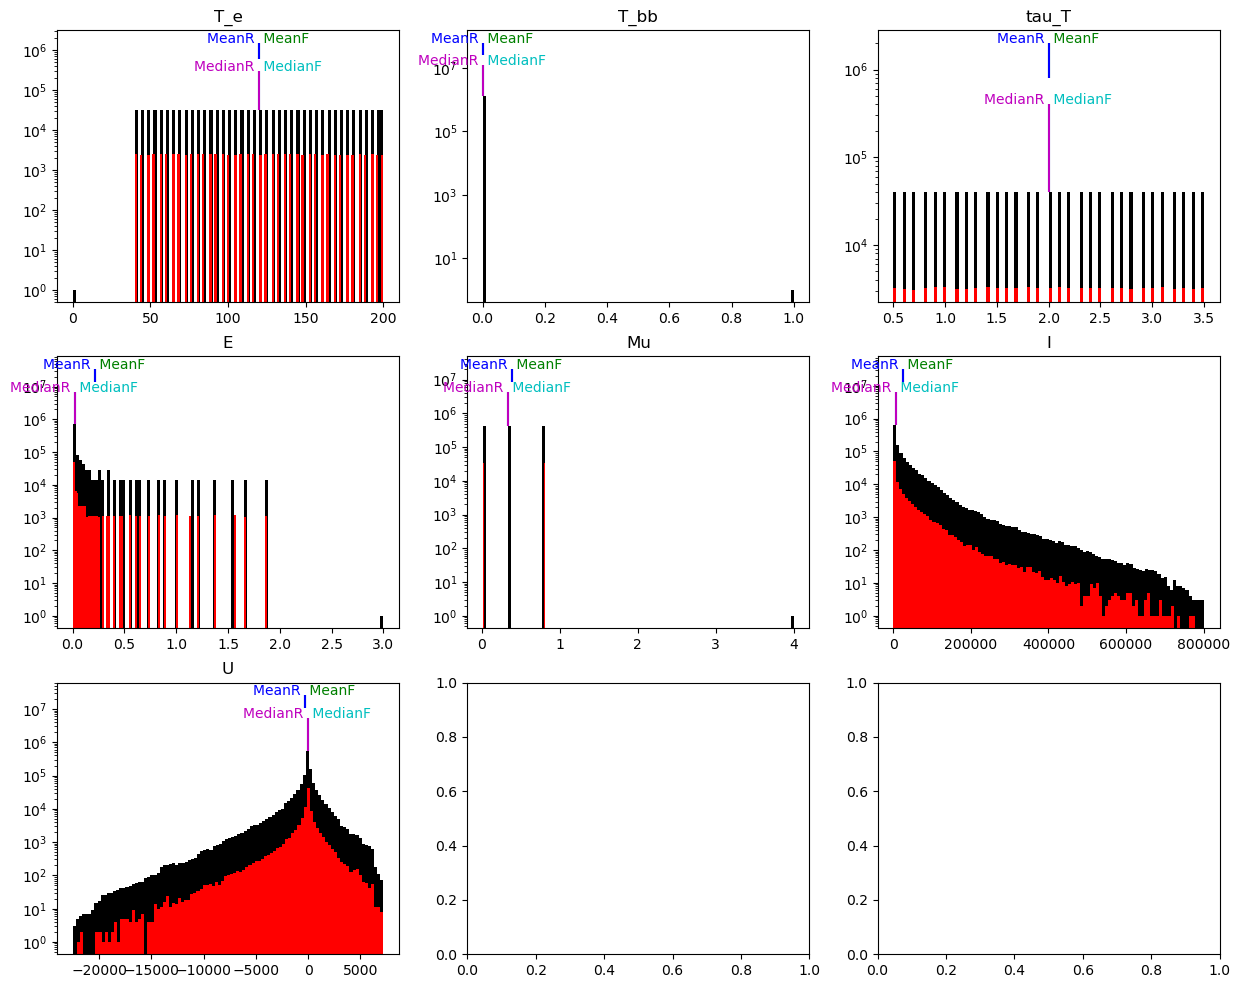

In [60]:
def make_histograms(data1,data2):

    import matplotlib.pyplot as plt
    f, ax = plt.subplots(3,3,figsize=[15,12])
    for i,c in enumerate(data1.columns):
        y, x, _ = ax[i//3][i%3].hist(data1[c],bins=100,color='k')
        _ = ax[i//3][i%3].hist(data2[c],bins=100,color='r')
        ax[i//3][i%3].set_title(c)
        ax[i//3][i%3].set_yscale('log')
        medianfull = np.median(data1[c])
        medianredc = np.median(data2[c])

        meanfull = np.mean(data1[c])
        meanredc = np.mean(data2[c])

        ax[i//3][i%3].vlines(medianfull,y.max(),y.max()*10,color='c')
        ax[i//3][i%3].vlines(medianredc,y.max(),y.max()*10,color='m')
        ax[i//3][i%3].text(medianfull,y.max()*10,' MedianF',ha='left',color='c') # "F" means full
        ax[i//3][i%3].text(medianredc,y.max()*10,'MedianR ',ha='right',color='m') # "R" means reduced

        ax[i//3][i%3].vlines(meanfull,y.max()*20,y.max()*50,color='g')
        ax[i//3][i%3].vlines(meanredc,y.max()*20,y.max()*50,color='b')
        ax[i//3][i%3].text(meanfull,y.max()*50,' MeanF',ha='left',color='g')
        ax[i//3][i%3].text(meanredc,y.max()*50,'MeanR ',ha='right',color='b')
        
make_histograms(df,df_small)

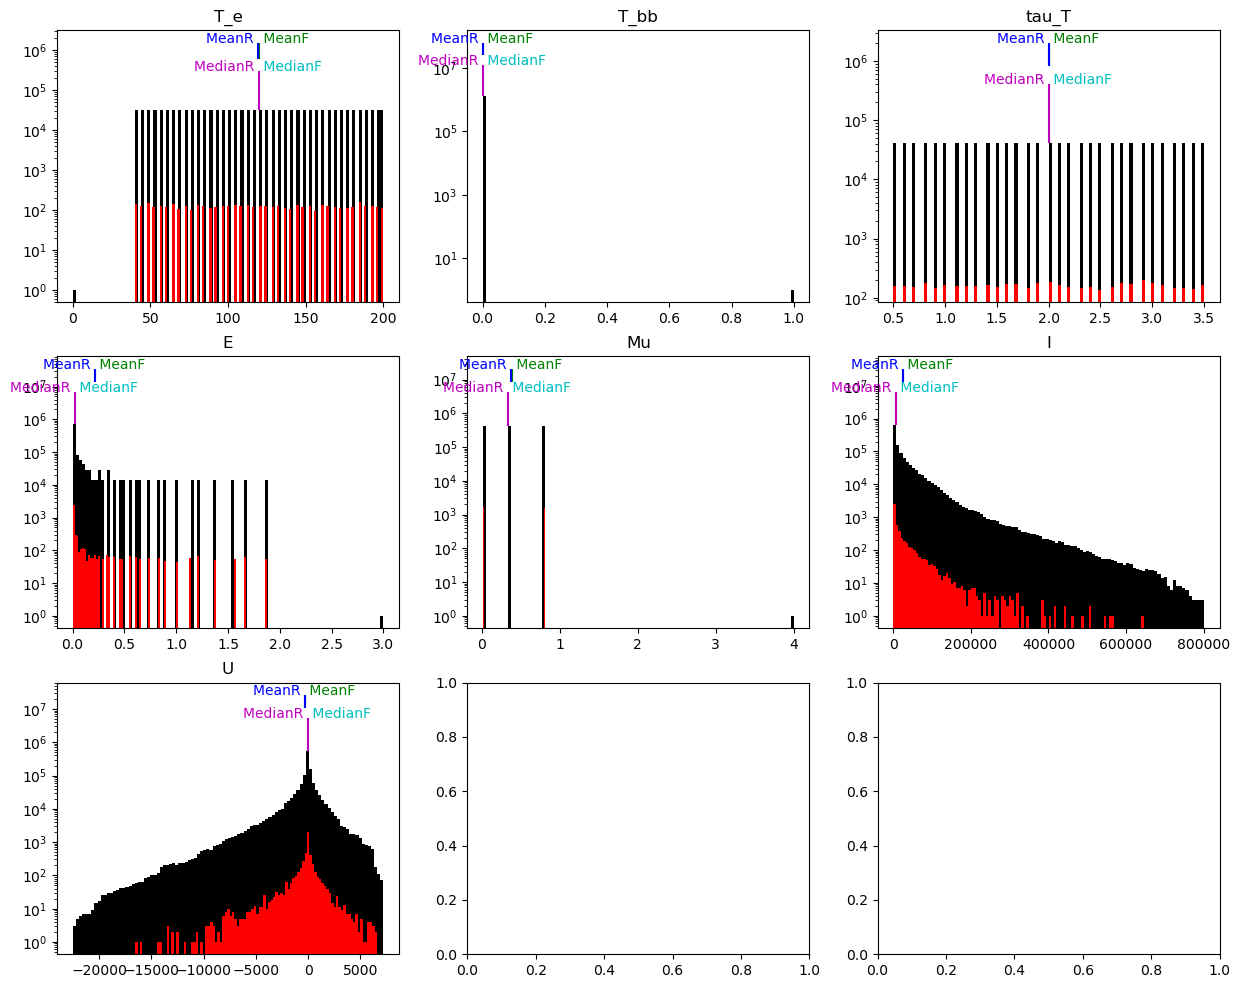

In [63]:
df_small_5K= df.sample(5000)
make_histograms(df,df_small_5K)

In [5]:
df_standardized= pd.DataFrame()
for a, b in enumerate(df):
    df_standardized[b]= scale(df[b])
print(df_standardized)

              T_e        T_bb     tau_T         E         Mu         I  \
0       -2.535455  914.268357  0.000000  6.877423  11.127883 -0.525736   
1       -1.690303   -0.916828 -1.677052 -0.524478  -1.142330 -0.522463   
2       -1.690303   -0.916828 -1.677052 -0.524447   1.293080 -0.510482   
3       -1.690303   -0.916828 -1.677052 -0.524378  -0.150776 -0.512191   
4       -1.690303   -0.916828 -1.677052 -0.524300  -1.142330 -0.516005   
...           ...         ...       ...       ...        ...       ...   
1258286  1.690307    0.915375  1.677052  2.477549   1.293080  0.024566   
1258287  1.690307    0.915375  1.677052  2.872667  -0.150776 -0.115085   
1258288  1.690307    0.915375  1.677052  3.319782  -1.142330 -0.373839   
1258289  1.690307    0.915375  1.677052  3.564942   1.293080 -0.404938   
1258290  1.690307    0.915375  1.677052  4.103156  -0.150776 -0.454098   

                U  
0        0.180581  
1        0.168484  
2        0.176533  
3        0.172246  
4        0.

In [67]:
df.describe()





,T_e,T_bb,tau_T,E,Mu,I,U
count,1.258291e+06,1.258291e+06,1.258291e+06,1.258291e+06,1.258291e+06,1.258291e+06,1.258291e+06
mean,1.199999e+02,2.000793e-03,2.000000e+00,2.127570e-01,3.868292e-01,2.613431e+04,-2.994199e+02
std,4.732876e+01,1.091583e-03,8.944272e-01,4.052745e-01,3.246954e-01,4.970042e+04,1.691320e+03
min,0.000000e+00,1.000000e-03,5.000000e-01,1.995262e-04,1.591990e-02,4.892186e-20,-2.252708e+04
25%,8.000000e+01,1.400000e-03,1.200000e+00,1.846898e-03,1.591990e-02,1.110355e+03,-3.500909e+02
50%,1.200000e+02,2.000000e-03,2.000000e+00,2.057893e-02,3.378730e-01,6.937283e+03,-1.221008e+01
75%,1.600000e+02,2.600000e-03,2.800000e+00,1.904872e-01,8.066860e-01,2.936317e+04,1.172595e+02
max,2.000000e+02,1.000000e+00,3.500000e+00,3.000000e+00,4.000000e+00,8.009238e+05,7.204209e+03


In [68]:
df_small.describe()

,T_e,T_bb,tau_T,E,Mu,I,U
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000
mean,119.799800,0.001998,1.999979,0.214613,0.385937,2.567008e+04,-288.921033
std,47.226433,0.000633,0.892515,0.406965,0.324099,4.884786e+04,1681.772137
min,40.000000,0.001000,0.500000,0.000200,0.015920,4.107009e-18,-22099.714105
25%,80.000000,0.001400,1.200000,0.001847,0.015920,1.073201e+03,-339.622172
50%,120.000000,0.002000,2.000000,0.020579,0.337873,6.869098e+03,-11.055344
75%,160.000000,0.002600,2.800000,0.190487,0.806686,2.905281e+04,119.773173
max,200.000000,0.003000,3.500000,1.875661,0.806686,7.780821e+05,7174.844843


In [69]:
df_small_5K.describe()

,T_e,T_bb,tau_T,E,Mu,I,U
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,119.549600,0.001987,2.002860,0.219906,0.380121,2.561769e+04,-309.890263
std,47.597082,0.000633,0.890119,0.408984,0.321925,4.975667e+04,1710.359101
min,40.000000,0.001000,0.500000,0.000200,0.015920,9.465754e-15,-16553.247068
25%,80.000000,0.001400,1.200000,0.002090,0.015920,1.094805e+03,-362.765002
50%,120.000000,0.002000,2.000000,0.020579,0.337873,6.797338e+03,-11.548527
75%,160.000000,0.002600,2.800000,0.215554,0.806686,2.853653e+04,116.714841
max,200.000000,0.003000,3.500000,1.875661,0.806686,6.460275e+05,6601.319417


# XGB boost with parameter optimization through grid search Cv for 10K dataset

In [9]:
!pip install xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import xgboost as xgb

In [47]:
X = df_small.drop(['I','U'],axis=1)
Y = np.log(df_small['I'])




    

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [49]:
model =xgb.XGBRegressor()
parameters = {'n_estimators':[4,16,64], 
              'learning_rate': [0.03, 0.05, .07],
              'max_depth': [2,4,6]
              }

xgb_grid = GridSearchCV(model,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=1000)
#FIT the model
xgb_fit= xgb_grid.fit(X_train,Y_train,verbose=False)


y_pred_1 = xgb_fit.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test, y_pred_1))
mae= (mean_absolute_error(Y_test, y_pred_1))
R2 = r2_score(Y_test, y_pred_1)


print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print("RMSE: %f" % (rmse))
print('MAE:%f' %(mae))
print("R2", (R2))








Fitting 3 folds for each of 27 candidates, totalling 81 fits
0.990557308944371
{'learning_rate': 0.07, 'max_depth': 6, 'n_estimators': 64}
RMSE: 0.398853
MAE:0.273253
R2 0.9905083582893285


In [50]:
model =xgb.XGBRegressor()
parameters = {'n_estimators':[20,50,150],
              'learning_rate': [0.03, 0.05, 0.08],
              'max_depth': [2,8,16]
              }

xgb_grid = GridSearchCV(model,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=1000)
#FIT the model
xgb_fit= xgb_grid.fit(X_train,Y_train,verbose=False)


y_pred_2 = xgb_fit.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test, y_pred_2))
mae= (mean_absolute_error(Y_test, y_pred_2))
R2 = r2_score(Y_test, y_pred_2)


print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print("RMSE: %f" % (rmse))
print('MAE:%f' %(mae))
print("R2", (R2))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
0.9987563275097516
{'learning_rate': 0.08, 'max_depth': 8, 'n_estimators': 150}
RMSE: 0.126338
MAE:0.075805
R2 0.9990476856043145


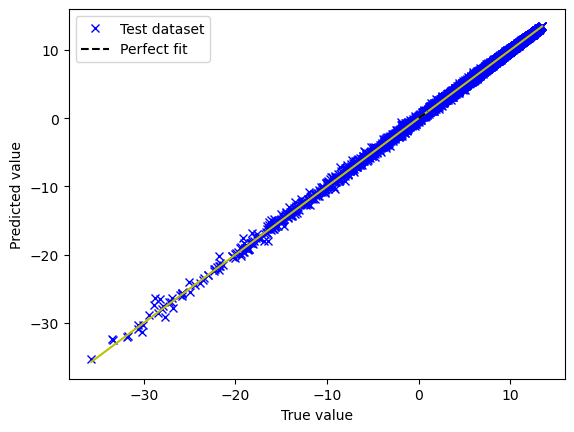

R2: 0.9990476856043145
MAE:%f 0.07580512553608179
RMSE: %f 0.126337505179154


In [52]:
model = xgb.XGBRegressor(n_estimators = 150, learning_rate = 0.08, max_depth = 8 )
model.fit(X_train,Y_train,verbose=False)
y_pred_2 = model.predict(X_test)


# Let's plot the prediction result.
plt.figure(1)
# Let's plot predictions as the function of real values:
plt.plot(Y_test, y_pred_2, 'x', color = 'b', label = 'Test dataset')
plt.plot([np.min(Y_test),np.max(Y_test)], [np.min(Y_test),np.max(Y_test)], '-', color = 'y')
plt.ylabel('Predicted value')
plt.xlabel('True value')
# A perfect fit would match 1-to-1 and thus follow this line:
plt.plot([0, 1], [0, 1], 'k--', label = 'Perfect fit')
plt.legend()
plt.show()


print('R2:',r2_score(Y_test,y_pred_2))
print('MAE:%f',(mean_absolute_error(Y_test,y_pred_2 )) )
print("RMSE: %f",(np.sqrt(mean_squared_error(Y_test, y_pred_2))))

R2: 0.9990562019949965
MAE:%f 0.07416088882439631
RMSE: %f 0.12664143204094744


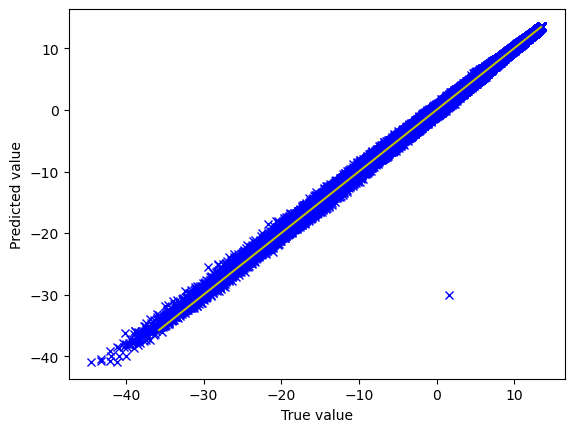

In [54]:


y_pred_2 = model.predict(df.drop(['I','U'],axis=1))
plt.figure(3)
# Let's plot predictions as the function of real values:
plt.plot(np.log(df['I']), y_pred_2, 'x', color = 'b', label = 'Test dataset')
plt.plot([np.min(Y_test),np.max(Y_test)], [np.min(Y_test),np.max(Y_test)], '-', color = 'y')
plt.ylabel('Predicted value')
plt.xlabel('True value')

print('R2:',r2_score(np.log(df['I']),y_pred))
print('MAE:%f',(mean_absolute_error(np.log(df['I']),y_pred )) )
print("RMSE: %f",(np.sqrt(mean_squared_error(np.log(df['I']), y_pred))))


# KRR Laplacian and Gaussian with 5K dataset

In [15]:
df_small_5K = df.sample(5000)
print(df_small_5K)


           T_e    T_bb  tau_T         E        Mu             I            U
1130406  184.0  0.0028    1.0  0.000327  0.337873   1568.275777   -52.354743
269137    72.0  0.0026    1.9  0.008142  0.015920  80747.535152 -9095.604899
193093    64.0  0.0016    1.1  0.015108  0.015920  17816.990559  -226.273485
345850    84.0  0.0014    3.4  0.243921  0.015920   3961.362282    48.216886
840751   148.0  0.0018    1.5  0.096508  0.015920  12357.935014   394.995566
...        ...     ...    ...       ...       ...           ...          ...
662385   124.0  0.0022    1.7  0.399957  0.337873  10169.923182   983.248373
773442   140.0  0.0014    1.1  0.293620  0.337873   1679.518024   189.085651
1245321  200.0  0.0022    1.5  0.742113  0.337873  10883.003323   797.679531
1100532  180.0  0.0028    1.9  0.000607  0.337873   2142.716420  -150.962669
386487    88.0  0.0022    2.1  0.002847  0.337873  27466.006397 -1974.536471

[5000 rows x 7 columns]


In [23]:
X = df_small_5K.drop(['I','U'],axis=1)
Y = np.log(df_small_5K['I'])

print(Y)

1130406     7.357732
269137     11.299083
193093      9.787908
345850      8.284343
840751      9.422054
             ...    
662385      9.227190
773442      7.426262
1245321     9.294958
1100532     7.669830
386487     10.220704
Name: I, Length: 5000, dtype: float64


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
from sklearn.kernel_ridge import KernelRidge

In [32]:
#KRR

alpha = np.logspace(-6, 0, 6)
gamma = np.logspace(-6, 0, 6)

cv_number = 3 ## choose into how many parts training set is divided for cross-validation
kernel = 'laplacian' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
scoring_function = 'neg_mean_absolute_error'

KRR_model= GridSearchCV(KernelRidge(),  
                           [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}],
                           cv = cv_number,
                           scoring= scoring_function,
                            verbose=1000)
KRR_model.fit(X_train,Y_train)

y_pred_new = KRR_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test, y_pred_new))
mae= (mean_absolute_error(Y_test, y_pred_new))
R2 = r2_score(Y_test, y_pred_new)

print(KRR_model.best_score_)
print(KRR_model.best_params_)
print("RMSE: %f" % (rmse))
print('MAE:%f' %(mae))
print("R2" '%f', (R2))





Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3; 1/36] START alpha=1e-06, gamma=1e-06, kernel=laplacian.................
[CV 1/3; 1/36] END alpha=1e-06, gamma=1e-06, kernel=laplacian;, score=-1.548 total time=   0.7s
[CV 2/3; 1/36] START alpha=1e-06, gamma=1e-06, kernel=laplacian.................
[CV 2/3; 1/36] END alpha=1e-06, gamma=1e-06, kernel=laplacian;, score=-1.657 total time=   1.0s
[CV 3/3; 1/36] START alpha=1e-06, gamma=1e-06, kernel=laplacian.................
[CV 3/3; 1/36] END alpha=1e-06, gamma=1e-06, kernel=laplacian;, score=-1.598 total time=   0.5s
[CV 1/3; 2/36] START alpha=1e-06, gamma=1.584893192461114e-05, kernel=laplacian.
[CV 1/3; 2/36] END alpha=1e-06, gamma=1.584893192461114e-05, kernel=laplacian;, score=-0.802 total time=   0.5s
[CV 2/3; 2/36] START alpha=1e-06, gamma=1.584893192461114e-05, kernel=laplacian.
[CV 2/3; 2/36] END alpha=1e-06, gamma=1.584893192461114e-05, kernel=laplacian;, score=-0.886 total time=   0.5s
[CV 3/3; 2/36] START 

In [35]:
alpha = np.logspace(-6, 0, 6)
gamma = np.logspace(-6, 0, 6)

cv_number = 3 
kernel = 'rbf' 
scoring_function = 'neg_mean_absolute_error'

KRR_model= GridSearchCV(KernelRidge(),  
                           [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}],
                           cv = cv_number,
                           scoring= scoring_function,
                            verbose=1000)
KRR_model.fit(X_train,Y_train)

y_predic = KRR_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test, y_predic))
mae= (mean_absolute_error(Y_test, y_predic))
R2 = r2_score(Y_test, y_predic)

print(KRR_model.best_score_)
print(KRR_model.best_params_)
print("RMSE: %f" % (rmse))
print('MAE:%f' %(mae))
print("R2" '%f', (R2))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3; 1/36] START alpha=1e-06, gamma=1e-06, kernel=rbf.......................
[CV 1/3; 1/36] END alpha=1e-06, gamma=1e-06, kernel=rbf;, score=-1.681 total time=   1.6s
[CV 2/3; 1/36] START alpha=1e-06, gamma=1e-06, kernel=rbf.......................
[CV 2/3; 1/36] END alpha=1e-06, gamma=1e-06, kernel=rbf;, score=-1.744 total time=   0.6s
[CV 3/3; 1/36] START alpha=1e-06, gamma=1e-06, kernel=rbf.......................
[CV 3/3; 1/36] END alpha=1e-06, gamma=1e-06, kernel=rbf;, score=-1.684 total time=   0.6s
[CV 1/3; 2/36] START alpha=1e-06, gamma=1.584893192461114e-05, kernel=rbf.......
[CV 1/3; 2/36] END alpha=1e-06, gamma=1.584893192461114e-05, kernel=rbf;, score=-1.529 total time=   0.5s
[CV 2/3; 2/36] START alpha=1e-06, gamma=1.584893192461114e-05, kernel=rbf.......
[CV 2/3; 2/36] END alpha=1e-06, gamma=1.584893192461114e-05, kernel=rbf;, score=-1.606 total time=   0.6s
[CV 3/3; 2/36] START alpha=1e-06, gamma=1.584893192

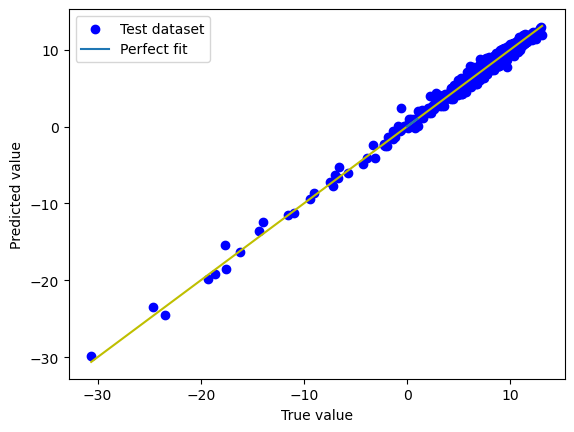

In [43]:
plt.scatter(Y_test, y_pred_new, color = 'b', label = 'Test dataset')
plt.plot([np.min(Y_test),np.max(Y_test)], [np.min(Y_test),np.max(Y_test)], '-', color = 'y')
plt.plot([0, 1], [0, 1], '-', label = 'Perfect fit')
plt.ylabel('Predicted value')
plt.xlabel('True value')

plt.legend()
plt.show()


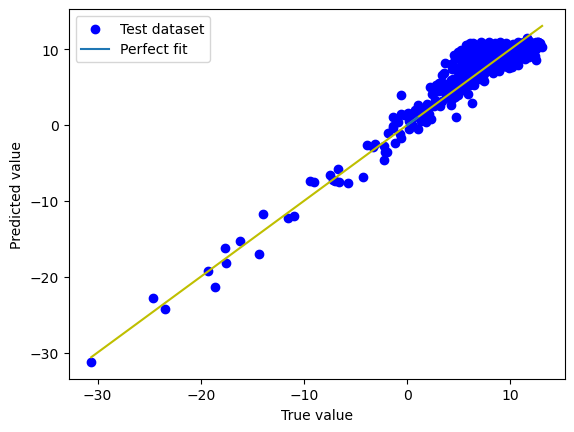

In [44]:
plt.scatter(Y_test, y_predic, color = 'b', label = 'Test dataset')
plt.plot([np.min(Y_test),np.max(Y_test)], [np.min(Y_test),np.max(Y_test)], '-',color = 'y')
plt.plot([0, 1], [0, 1], '-', label = 'Perfect fit')
plt.ylabel('Predicted value')
plt.xlabel('True value')
plt.legend()
plt.show()


In [ ]:
y_pred = KRR_model.predict(df.drop(['I','U'],axis=1))
plt.figure(3)
# Let's plot predictions as the function of real values:
plt.plot(df['I'], y_pred, 'x', color = 'b', label = 'Test dataset')
plt.ylabel('Predicted value')
plt.xlabel('True value')

print('R2:',r2_score(df['I'],y_pred))
print('MAE:%f',(mean_absolute_error(df['I'],y_pred )) )
print("RMSE: %f",(np.sqrt(mean_squared_error(df['I'], y_pred))))